In [20]:
!pip install easyocr
!pip install torch torchvision torchaudio

     ---------------------------------------- 2.9/2.9 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 95.1/95.1 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 313.0/313.0 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.8 MB/s eta 0:00:00


In [21]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [29]:
IMAGE_PATH = r'C:\Users\logi\Downloads\demo jpeg text.png'

In [23]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[4, 6], [218, 6], [218, 36], [4, 36]],
  'It was the best of',
  0.7971562017218529),
 ([[3, 40], [276, 40], [276, 70], [3, 70]],
  'times, it was the worst',
  0.7649300445572378),
 ([[3, 73], [281, 73], [281, 109], [3, 109]],
  'of times, it was the age',
  0.9663759639876809),
 ([[3, 103], [263, 103], [263, 139], [3, 139]],
  'of wisdom; it was the',
  0.8666285311561782),
 ([[3, 137], [229, 137], [229, 175], [3, 175]],
  'age of foolishness_',
  0.9592305650963302)]

In [24]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

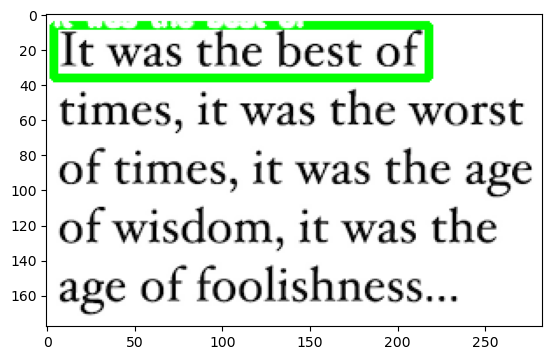

In [25]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

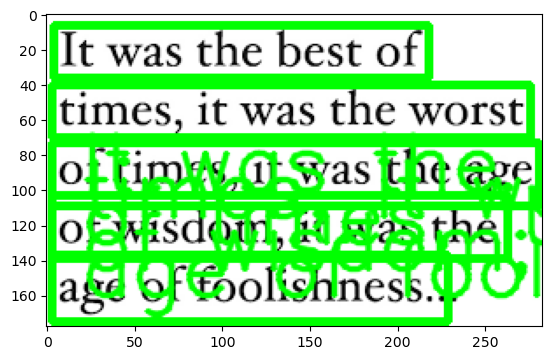

In [28]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 1.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

In [30]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [31]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
IMAGE_PATH = r'C:\Users\logi\Downloads\demo jpeg text.png'

In [33]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [34]:
result = recognize_text(IMAGE_PATH)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [35]:
result


[([[4, 6], [218, 6], [218, 36], [4, 36]],
  'It was the best of',
  0.7971562017218529),
 ([[3, 40], [276, 40], [276, 70], [3, 70]],
  'times, it was the worst',
  0.7649300445572378),
 ([[3, 73], [281, 73], [281, 109], [3, 109]],
  'of times, it was the age',
  0.9663759639876809),
 ([[3, 103], [263, 103], [263, 139], [3, 139]],
  'of wisdom; it was the',
  0.8666285311561782),
 ([[3, 137], [229, 137], [229, 175], [3, 175]],
  'age of foolishness_',
  0.9592305650963302)]

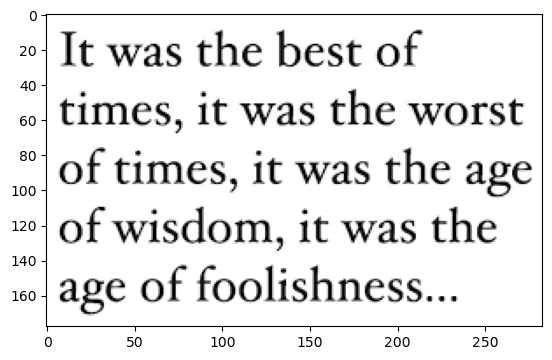

In [36]:
img_1 = cv2.imread(IMAGE_PATH)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [37]:
 def overlay_ocr_text(img_path, save_name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: It was the best of (Probability: 0.80)
Detected text: times, it was the worst (Probability: 0.76)
Detected text: of times, it was the age (Probability: 0.97)
Detected text: of wisdom; it was the (Probability: 0.87)
Detected text: age of foolishness_ (Probability: 0.96)


FileNotFoundError: [Errno 2] No such file or directory: './output/2_handwriting_overlay.jpg'

<Figure size 640x480 with 0 Axes>

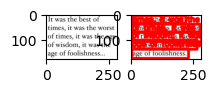

In [38]:
overlay_ocr_text(IMAGE_PATH, '2_handwriting')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: It was the best of (Probability: 0.80)
Detected text: times, it was the worst (Probability: 0.76)
Detected text: of times, it was the age (Probability: 0.97)
Detected text: of wisdom; it was the (Probability: 0.87)
Detected text: age of foolishness_ (Probability: 0.96)


FileNotFoundError: [Errno 2] No such file or directory: './output/3_digits_overlay.jpg'

<Figure size 640x480 with 0 Axes>

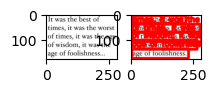

In [39]:
overlay_ocr_text(IMAGE_PATH, '3_digits')

In [40]:
!pip install pyttsx3

In [42]:
result = recognize_text(IMAGE_PATH)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)



CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


It was the best of times, it was the worst of times, it was the age of wisdom; it was the age of foolishness_ 


In [43]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()